### Handwritten Digit Classification Using k-Nearest Neighbors (k-NN)
##### Goal: Classify images of handwritten digits (0-9) using the k-Nearest Neighbors algorithm.

#### Data Collection
We will use the MNIST dataset, which is available through Keras.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [7]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Split the data into features and target
X, y = mnist['data'], mnist['target']

# Check the shape of the dataset
print('Data shape:', X.shape)
print('Target shape:', y.shape)

# Convert the target variable to integers
y = y.astype(int)


Data shape: (70000, 784)
Target shape: (70000,)


#### Exploratory Data Analysis (EDA)

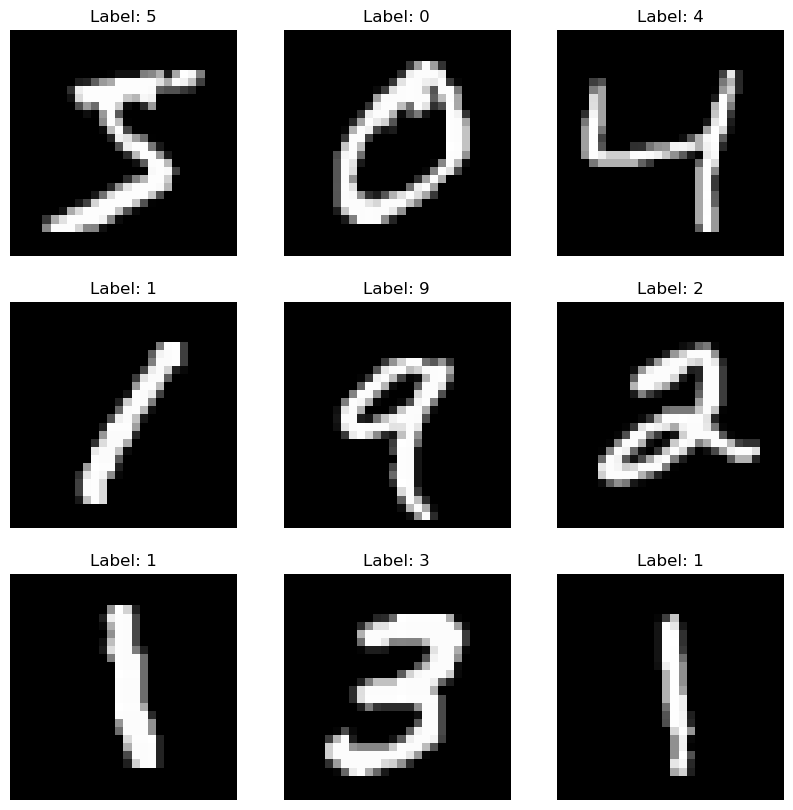

In [8]:
import matplotlib.pyplot as plt

# Visualize some of the data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')
plt.show()


We visualize a few images from the dataset to understand what the data looks like.

#### Model Building with k-Nearest Neighbors

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

We split the dataset into training and testing sets and create a k-NN classifier with 3 neighbors, fitting it to the training data.

#### Predictions with k-Nearest Neighbors

In [10]:
# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Show predictions for the first 10 test images
predictions_knn_df = pd.DataFrame({'Actual': y_test[:10], 'Predicted': knn_y_pred[:10]})
print(predictions_knn_df)


       Actual  Predicted
46730       8          8
48393       4          4
41416       8          8
34506       7          7
43725       7          7
11615       0          0
24656       6          6
22411       2          2
936         7          7
56364       4          4


We make predictions on the test set and display the actual versus predicted labels for the first 10 images.

#### Model Evaluation for k-Nearest Neighbors

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the k-NN model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

print('k-NN Accuracy:', knn_accuracy)
print('k-NN Classification Report:\n', knn_report)


k-NN Accuracy: 0.9712857142857143
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.97      0.97      0.97      1380
           3       0.97      0.96      0.97      1433
           4       0.97      0.96      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.94      0.96      1357
           9       0.96      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



There we go! Our model performs very well. 

This concludes our miniproject